In [1]:
import pandas as pd

In [16]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB 435.7 kB/s eta 0:03:52
   ---------------------------------------- 0.0/101.0 MB 435.7 kB/s eta 0:03:52
   ---------------------------------------- 0.0/101.0 MB 435.7 kB/s eta 0:03:52
   ---------------------------------------- 0.0/101.0 MB 435.7 kB/s eta 0:03:52
   ---------------------------------------- 0.1/101.0 MB 204.8 kB/s eta 0:08:13
   ---------------------------------------- 0.1/101.0 MB 262.6 kB/s eta 0:06:25
   ---------------------------------------- 0.1/101.0 MB 262.6 kB/s eta 0:06:25
   ---------------------------------------- 0.1/101.0 MB 262.6 kB/s eta 0:06:25
   -----

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
X=df.iloc[:,1:22]
y=df.iloc[:,0]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (253680, 21) 
y -  (253680,)


In [5]:
X.isnull().sum()

HighBP               0
HighChol             0
CholCheck            0
BMI                  0
Smoker               0
Stroke               0
Diabetes             0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
AnyHealthcare        0
NoDocbcCost          0
GenHlth              0
MentHlth             0
PhysHlth             0
DiffWalk             0
Sex                  0
Age                  0
Education            0
Income               0
dtype: int64

In [6]:
#MLP Sigmoid
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],  # Number of neurons in each hidden layer
    'activation': ['logistic'],  # Sigmoid activation function
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
}

# Create an MLP classifier with the sigmoid activation function
mlp = MLPClassifier(activation='logistic')

# Initialize GridSearchCV
grid_search = GridSearchCV(mlp, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_mlp = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best MLP model on the test set
y_pred = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", best_params)
print("Execution Time:", execution_time, "seconds")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Accuracy: 0.9079598321000978
Test Accuracy: 0.9084082308420057
Best Hyperparameters: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
Execution Time: 1109.002771615982 seconds


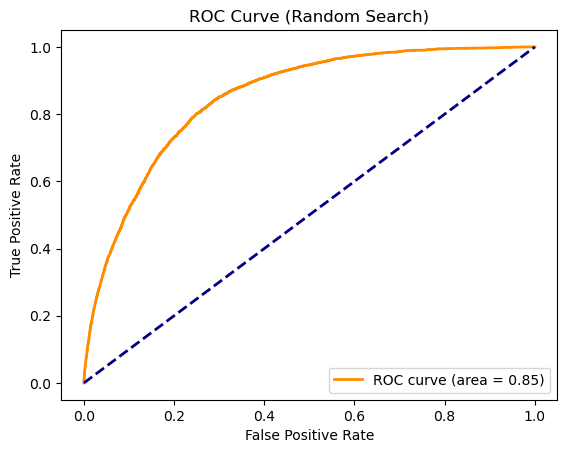

Specificity (Random Search): 0.99
Sensitivity (Random Search): 0.13
NPV (Random Search): 0.92
PPV (Random Search): 0.56


In [9]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted probabilities for the positive class
y_prob_random = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_random, tpr_random, _ = roc_curve(y_test, y_prob_random)
roc_auc_random = auc(fpr_random, tpr_random)

# Plot ROC curve
plt.figure()
plt.plot(fpr_random, tpr_random, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_random))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Search)')
plt.legend(loc='lower right')
plt.show()

# Calculate confusion matrix
y_pred_random = grid_search.predict(X_test)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

# Calculate specificity, sensitivity, NPV, and PPV
specificity_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[0, 1])
sensitivity_random = conf_matrix_random[1, 1] / (conf_matrix_random[1, 0] + conf_matrix_random[1, 1])
npv_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[1, 0])
ppv_random = conf_matrix_random[1, 1] / (conf_matrix_random[0, 1] + conf_matrix_random[1, 1])

print("Specificity (Random Search): {:.2f}".format(specificity_random))
print("Sensitivity (Random Search): {:.2f}".format(sensitivity_random))
print("NPV (Random Search): {:.2f}".format(npv_random))
print("PPV (Random Search): {:.2f}".format(ppv_random))

In [12]:
#XGBoost
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time

# Assuming X and y are your feature matrix and target variable
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space for XGBoost
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_xgb = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best XGBoost model on the test set
y_pred = best_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", random_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")
print("Execution Time:", execution_time, "seconds")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy: 0.9081027290511949
Test Accuracy: 0.9082702617470829
Best Hyperparameters:
  subsample: 1.0
  n_estimators: 200
  max_depth: 3
  learning_rate: 0.1
  colsample_bytree: 0.8
Execution Time: 56.45135736465454 seconds


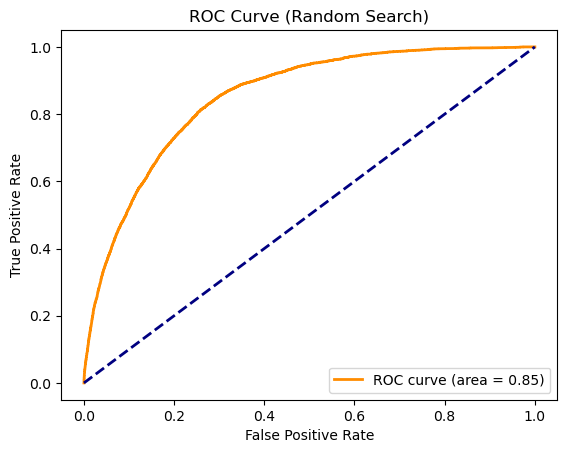

Specificity (Random Search): 0.99
Sensitivity (Random Search): 0.11
NPV (Random Search): 0.91
PPV (Random Search): 0.56


In [13]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted probabilities for the positive class
y_prob_random = random_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_random, tpr_random, _ = roc_curve(y_test, y_prob_random)
roc_auc_random = auc(fpr_random, tpr_random)

# Plot ROC curve
plt.figure()
plt.plot(fpr_random, tpr_random, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_random))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Search)')
plt.legend(loc='lower right')
plt.show()

# Calculate confusion matrix
y_pred_random = random_search.predict(X_test)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

# Calculate specificity, sensitivity, NPV, and PPV
specificity_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[0, 1])
sensitivity_random = conf_matrix_random[1, 1] / (conf_matrix_random[1, 0] + conf_matrix_random[1, 1])
npv_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[1, 0])
ppv_random = conf_matrix_random[1, 1] / (conf_matrix_random[0, 1] + conf_matrix_random[1, 1])

print("Specificity (Random Search): {:.2f}".format(specificity_random))
print("Sensitivity (Random Search): {:.2f}".format(sensitivity_random))
print("NPV (Random Search): {:.2f}".format(npv_random))
print("PPV (Random Search): {:.2f}".format(ppv_random))

In [14]:
#XGBoost
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.metrics import accuracy_score
import time

# Assuming X and y are your feature matrix and target variable
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_xgb = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best XGBoost model on the test set
y_pred = best_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")
print("Execution Time:", execution_time, "seconds")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Accuracy: 0.9081914243677393
Test Accuracy: 0.9082111321349732
Best Hyperparameters:
  colsample_bytree: 0.8
  learning_rate: 0.1
  max_depth: 5
  n_estimators: 50
  subsample: 1.0
Execution Time: 1545.56906914711 seconds


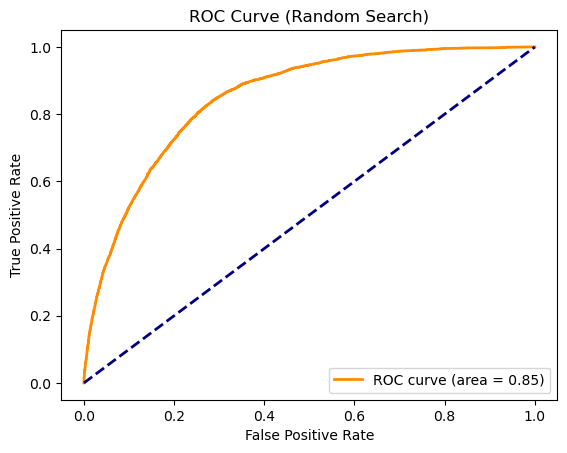

Specificity (Random Search): 0.99
Sensitivity (Random Search): 0.09
NPV (Random Search): 0.91
PPV (Random Search): 0.58


In [15]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted probabilities for the positive class
y_prob_random = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_random, tpr_random, _ = roc_curve(y_test, y_prob_random)
roc_auc_random = auc(fpr_random, tpr_random)

# Plot ROC curve
plt.figure()
plt.plot(fpr_random, tpr_random, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_random))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Search)')
plt.legend(loc='lower right')
plt.show()

# Calculate confusion matrix
y_pred_random = grid_search.predict(X_test)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

# Calculate specificity, sensitivity, NPV, and PPV
specificity_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[0, 1])
sensitivity_random = conf_matrix_random[1, 1] / (conf_matrix_random[1, 0] + conf_matrix_random[1, 1])
npv_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[1, 0])
ppv_random = conf_matrix_random[1, 1] / (conf_matrix_random[0, 1] + conf_matrix_random[1, 1])

print("Specificity (Random Search): {:.2f}".format(specificity_random))
print("Sensitivity (Random Search): {:.2f}".format(sensitivity_random))
print("NPV (Random Search): {:.2f}".format(npv_random))
print("PPV (Random Search): {:.2f}".format(ppv_random))

In [17]:
#CatBoost
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier  # Import CatBoost classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time

# Assuming X and y are your feature matrix and target variable
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space for CatBoost
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'iterations': [50, 100, 200],  # Number of boosting rounds
    'depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bylevel': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(catboost_classifier, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_catboost = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best CatBoost model on the test set
y_pred = best_catboost.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", random_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")
print("Execution Time:", execution_time, "seconds")


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\anaconda3\Lib\site-packages\catboost\core.py", line 5100, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\Hp\anaconda3\Lib\site-packages\catboost\core.py", line 2319, in _fit
    sel

0:	learn: 0.5824846	total: 179ms	remaining: 17.7s
1:	learn: 0.5037666	total: 217ms	remaining: 10.6s
2:	learn: 0.4485480	total: 255ms	remaining: 8.24s
3:	learn: 0.4015091	total: 285ms	remaining: 6.84s
4:	learn: 0.3679650	total: 306ms	remaining: 5.82s
5:	learn: 0.3406171	total: 327ms	remaining: 5.12s
6:	learn: 0.3231299	total: 349ms	remaining: 4.63s
7:	learn: 0.3082832	total: 373ms	remaining: 4.29s
8:	learn: 0.2951584	total: 400ms	remaining: 4.04s
9:	learn: 0.2869111	total: 425ms	remaining: 3.82s
10:	learn: 0.2802188	total: 448ms	remaining: 3.62s
11:	learn: 0.2732298	total: 473ms	remaining: 3.47s
12:	learn: 0.2678720	total: 494ms	remaining: 3.31s
13:	learn: 0.2646435	total: 513ms	remaining: 3.15s
14:	learn: 0.2610419	total: 534ms	remaining: 3.02s
15:	learn: 0.2580707	total: 555ms	remaining: 2.91s
16:	learn: 0.2554844	total: 575ms	remaining: 2.81s
17:	learn: 0.2534027	total: 594ms	remaining: 2.71s
18:	learn: 0.2515035	total: 615ms	remaining: 2.62s
19:	learn: 0.2497560	total: 653ms	remaini

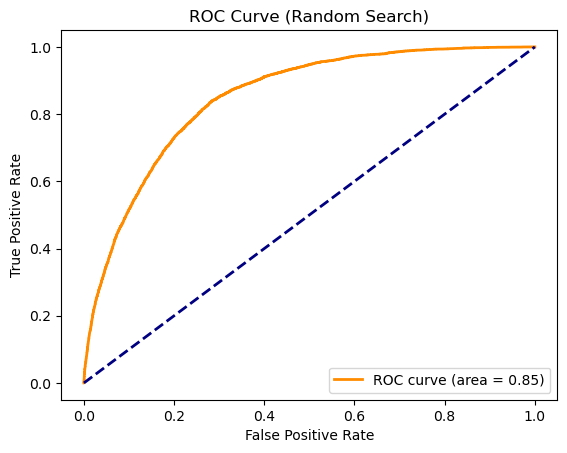

Specificity (Random Search): 0.99
Sensitivity (Random Search): 0.11
NPV (Random Search): 0.91
PPV (Random Search): 0.57


In [18]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted probabilities for the positive class
y_prob_random = random_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_random, tpr_random, _ = roc_curve(y_test, y_prob_random)
roc_auc_random = auc(fpr_random, tpr_random)

# Plot ROC curve
plt.figure()
plt.plot(fpr_random, tpr_random, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_random))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Search)')
plt.legend(loc='lower right')
plt.show()

# Calculate confusion matrix
y_pred_random = random_search.predict(X_test)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

# Calculate specificity, sensitivity, NPV, and PPV
specificity_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[0, 1])
sensitivity_random = conf_matrix_random[1, 1] / (conf_matrix_random[1, 0] + conf_matrix_random[1, 1])
npv_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[1, 0])
ppv_random = conf_matrix_random[1, 1] / (conf_matrix_random[0, 1] + conf_matrix_random[1, 1])

print("Specificity (Random Search): {:.2f}".format(specificity_random))
print("Sensitivity (Random Search): {:.2f}".format(sensitivity_random))
print("NPV (Random Search): {:.2f}".format(npv_random))
print("PPV (Random Search): {:.2f}".format(ppv_random))

In [19]:
#CatBoost
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier  # Import CatBoost classifier
from sklearn.metrics import accuracy_score
import time

# Assuming X and y are your feature matrix and target variable
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space for CatBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'iterations': [50, 100, 200],  # Number of boosting rounds
    'depth': [3, 5, 7],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bylevel': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(catboost_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_catboost = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best CatBoost model on the test set
y_pred = best_catboost.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", grid_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"  {param}: {value}")
print("Execution Time:", execution_time, "seconds")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
0:	learn: 0.5790154	total: 47.8ms	remaining: 2.34s
1:	learn: 0.4960968	total: 99.5ms	remaining: 2.39s
2:	learn: 0.4374140	total: 147ms	remaining: 2.31s
3:	learn: 0.3866438	total: 191ms	remaining: 2.2s
4:	learn: 0.3486713	total: 233ms	remaining: 2.09s
5:	learn: 0.3281738	total: 288ms	remaining: 2.11s
6:	learn: 0.3078205	total: 334ms	remaining: 2.05s
7:	learn: 0.2918020	total: 374ms	remaining: 1.96s
8:	learn: 0.2809436	total: 418ms	remaining: 1.9s
9:	learn: 0.2721518	total: 469ms	remaining: 1.88s
10:	learn: 0.2654764	total: 518ms	remaining: 1.84s
11:	learn: 0.2593208	total: 564ms	remaining: 1.78s
12:	learn: 0.2555036	total: 611ms	remaining: 1.74s
13:	learn: 0.2516506	total: 659ms	remaining: 1.69s
14:	learn: 0.2487563	total: 711ms	remaining: 1.66s
15:	learn: 0.2466183	total: 755ms	remaining: 1.6s
16:	learn: 0.2448883	total: 797ms	remaining: 1.55s
17:	learn: 0.2436830	total: 841ms	remaining: 1.5s
18:	learn: 0.2423744	total: 88

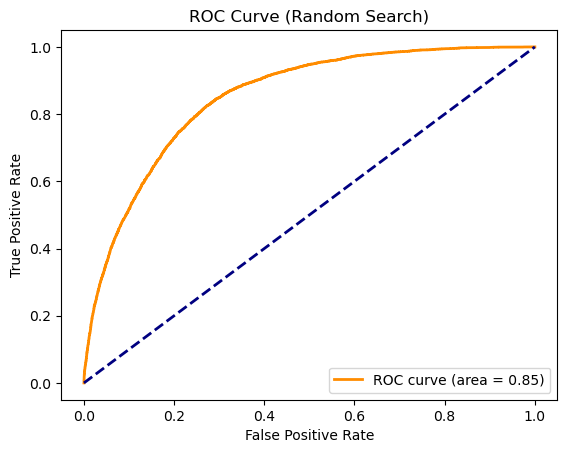

Specificity (Random Search): 0.99
Sensitivity (Random Search): 0.09
NPV (Random Search): 0.91
PPV (Random Search): 0.59


In [20]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt


# Get the predicted probabilities for the positive class
y_prob_random = grid_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr_random, tpr_random, _ = roc_curve(y_test, y_prob_random)
roc_auc_random = auc(fpr_random, tpr_random)

# Plot ROC curve
plt.figure()
plt.plot(fpr_random, tpr_random, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_random))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Search)')
plt.legend(loc='lower right')
plt.show()

# Calculate confusion matrix
y_pred_random = grid_search.predict(X_test)
conf_matrix_random = confusion_matrix(y_test, y_pred_random)

# Calculate specificity, sensitivity, NPV, and PPV
specificity_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[0, 1])
sensitivity_random = conf_matrix_random[1, 1] / (conf_matrix_random[1, 0] + conf_matrix_random[1, 1])
npv_random = conf_matrix_random[0, 0] / (conf_matrix_random[0, 0] + conf_matrix_random[1, 0])
ppv_random = conf_matrix_random[1, 1] / (conf_matrix_random[0, 1] + conf_matrix_random[1, 1])

print("Specificity (Random Search): {:.2f}".format(specificity_random))
print("Sensitivity (Random Search): {:.2f}".format(sensitivity_random))
print("NPV (Random Search): {:.2f}".format(npv_random))
print("PPV (Random Search): {:.2f}".format(ppv_random))